<a href="https://colab.research.google.com/github/shivamishu/cmpe255/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement various clustering algorithms in colabs
**Shivam Shrivastav**  

# DBSCAN

DBSCAN is short name for Density-Based Spatial Clustering for Applications with Noise. DBSCAN is a density cluster algorithm. This algorithm assume that there is cluster where the density points is high (there isn't centroids in DBSCAN).

## Setup required

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [ ]:
# df_cluster = pd.DataFrame(np.load(urlopen("https://github.com/scikit-learn-contrib/hdbscan/blob/master/notebooks/clusterable_data.npy")),
df_cluster = pd.DataFrame(np.load("sample_data/clusterable_data.npy"),
                          columns=['x', 'y'])
df_cluster[:5]

,x,y
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


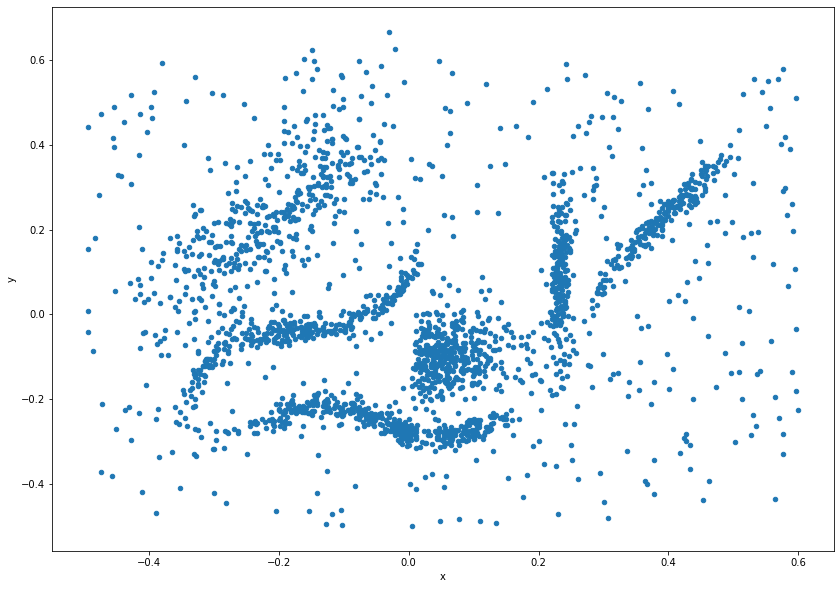

In [ ]:
df_cluster.plot(kind='scatter',
               x='x',
               y='y',
               figsize=(14,10))

Hyperparameters  
eps: epsilon, the maximun distance between two samples. This parameter change the density function of the algorithm and help us to increase/decrease the number of clusters.  
min_samples: number of samples necesary for a point being core.  
metric: the metric that the algorithm use to compute distance, could be euclidian or a sparse matrix precomputed by ourselves.  
algorithm: this algorithm use neighbours aproximations to compute pointwise distances and find the nearest neighbors, as we saw in KNN we have 4 kind of algorithms that compute distances:   
* brute: it's use a brute-force search wich means that our algorithm will compute all the distances between all points.  
* kd_tree: it's recommended if we have a medium data dataset. Based on trees the idea of this algorithm is simple, if we know that a point A is very distant from point B and point B very close to point C then we know that points A and C are very distant. This saves us computer time.   
* ball_tree: it's very simmilar to kd_tree but works better if we have a big dataset.  
* auto: the algorithm will choose the best kernel for our dataset.     

leaf_size: if you choose a kernel based on trees, then you can set the number of leaf.  
P: The power of the Minkowski metric to be used to calculate distance between points.   

In [ ]:
dbscan = DBSCAN(eps=0.033,
               min_samples=22,
               algorithm='brute',
               p=0.9)
preds = dbscan.fit_predict(df_cluster)

In [ ]:
len(dbscan.core_sample_indices_)

1364

In [ ]:
#Our sihouette score is bad
silhouette_score(df_cluster, preds)

0.19592842860298926

In [ ]:
#but our harabasz score is good
calinski_harabasz_score(df_cluster, preds)

360.0211550733057

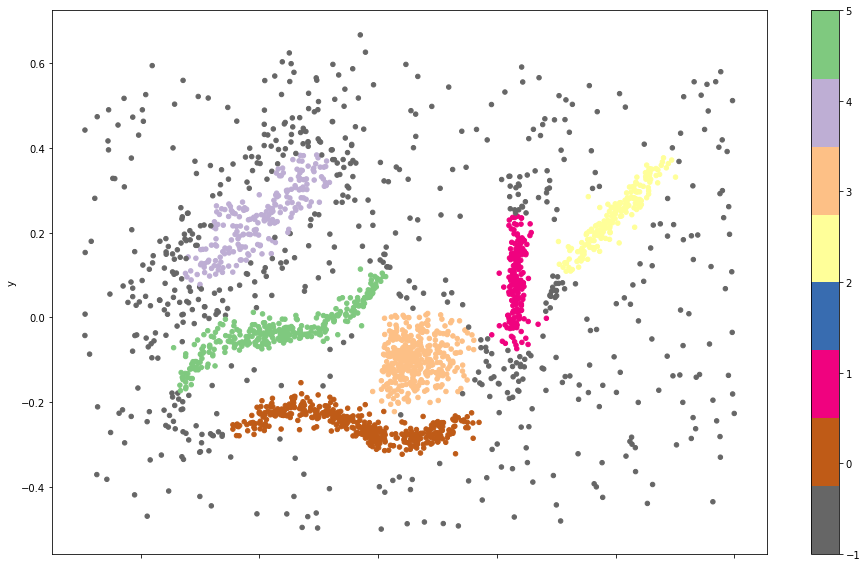

In [ ]:
df_cluster.plot(kind='scatter', x='x', y='y', c=preds, cmap='Accent_r', figsize=(16,10))
pass

Conclusions of DBSCAN algorithm    
Pros:  
Is one of the most powerfull algorithm for cluster.   
Clusters (Components are called in this algorithm) don't have to be spherical
With the hyperparameters the model infer the cluster, we don't need to pass a number of clusters.  
It's very robust with outliers.   
The algorithm discard point that not meet the needs of density and distance (the gray points)
Cons:  
It's not deterministic, the solutions will be differents in each train.  
The clusters must have all the same density.  